In [1]:
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
from rasterio.features import bounds
from shapely.geometry import box
from matplotlib_scalebar.scalebar import ScaleBar

In [2]:
shapefile_path = "../gis/v1/admin_L1_NL_NUTS_RG.shp"
annotation_path ="../gis/v1/fixed_substations_NL_annotations.shp"
raster_path = "../NSO/NSO_big_tiles"
#new_crs = "EPSG:28992"
new_crs = "EPSG:4326"


/scratch/350203/ipykernel_3299696/2057174638.py:45: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  annotation_data.centroid.plot(ax=ax, marker='.', color='xkcd:pumpkin orange', alpha=1, markersize=50,
/scratch/350203/ipykernel_3299696/2057174638.py:51: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc='upper left', prop={'size': 9})


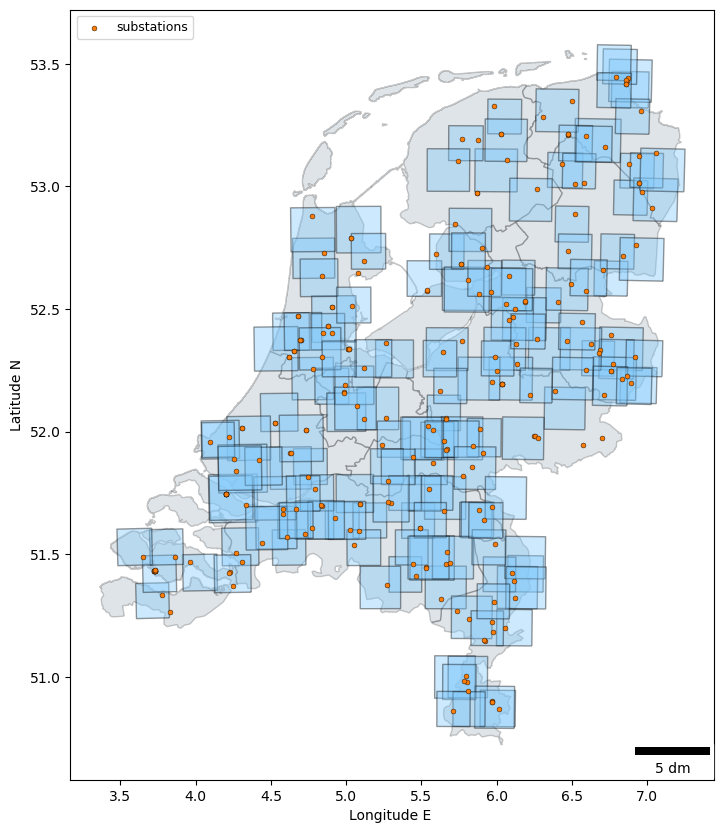

In [34]:
#Read country shapefile and crs
country_data = gpd.read_file(shapefile_path)
country_data = country_data.to_crs(new_crs)

# Read and convert crs of annotation shapefile to country shapefile
annotation_data = gpd.read_file(annotation_path)
annotation_data = annotation_data.to_crs(new_crs)

# Make a list of file ending in .tif
raster_files = os.listdir(raster_path)
list_raster = [f for f in raster_files if f.endswith('.tif')]


#Plot WITH GDF
fig, ax = plt.subplots(figsize=(10, 10))
vector_data_list = []

for raster_file in list_raster:
    f = os.path.join(raster_path, raster_file)
    with rasterio.open(f) as src:
        # Read the raster bounds
        bounds = src.bounds
        src_crs= src.crs

        # Create a polygon from the bounding box coordinates
        polygon = box(bounds.left, bounds.bottom, bounds.right, bounds.top)

        # Append the polygon to the vector data list
        gdf = gpd.GeoDataFrame(geometry=[polygon])
        gdf = gdf.set_crs(src_crs)
        gdf = gdf.to_crs(new_crs)

        # Validate the geometry
        if not gdf.is_valid.all():
            gdf.geometry = gdf.geometry.buffer(0)

        vector_data_list.append(gdf)

gdf2 = gpd.GeoDataFrame(pd.concat(vector_data_list))
gdf2 = gdf2.set_crs(new_crs)

#Plot all
gdf2.plot(ax=ax, color='xkcd:sky', alpha=0.4, zorder=2, edgecolors='black', linewidth=1, label="rasters")
country_data.plot(ax=ax, color='xkcd:blue grey', alpha=0.2, edgecolor='black', zorder=1)
annotation_data.centroid.plot(ax=ax, marker='.', color='xkcd:pumpkin orange', alpha=1, markersize=50,
                              edgecolors='black', linewidth=0.3, zorder=3, label="substations")

# Add latitude and longitude labels
ax.set_xlabel('Longitude E ')
ax.set_ylabel('Latitude N')
ax.legend(loc='upper left', prop={'size': 9})
#Scalebar
ax.add_artist(ScaleBar(1,location="lower right"))
# Set the aspect ratio and display the plot
#ax.set_aspect('equal')
plt.show()
plt.savefig("distibution.png")

In [11]:
# Step 1: Read the GeoDataFrame from your data source (replace 'your_data_file.shp' with your actual file name)
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

new_crs = "EPSG:28992"
annotation_path = '/Users/joeldeplaen/Documents/GitHub/subs_detection/gis/v1/fixed_substations_NL_annotations.shp'
# Step 2: Calculate the size of each polygon (in this example, using the area)
annotation_data = gpd.read_file(annotation_path)
annotation_data = annotation_data.to_crs(new_crs)
annotation_data['polygon_area'] = annotation_data.area

# Step 5: Find the minimum and maximum area values
min_area = annotation_data['polygon_area'].min()
max_area = annotation_data['polygon_area'].max()
bin_edges = np.arange(min_area, max_area + 10000, 10000)

# Step 6: Print the results
print("Minimum Area:", min_area)
print("Maximum Area:", max_area)

# Step 3: Plot the distribution of polygon sizes using a histogram
plt.figure(figsize=(10, 6))
plt.hist(annotation_data['polygon_area'], bins=bin_edges, edgecolor='black', alpha=0.7)
plt.xlabel('Asset Size [sqmeter]')
plt.ylabel('Frequency')
plt.title('Distribution of Assets Area')
plt.grid(True)
plt.xlim(0)
plt.ylim(0)
plt.show()
plt.savefig("distibution.png")

CRSError: Invalid projection: epsg:4326: (Internal Proj Error: proj_create: SQLite error on SELECT name, type, coordinate_system_auth_name, coordinate_system_code, datum_auth_name, datum_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM geodetic_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name)

In [10]:
# If pyproj SQL error set the right data dir path => somehow not the right path...
import pyproj
pyproj.datadir.get_data_dir()
pyproj.datadir.set_data_dir('/scistor/ivm/jpl204/miniconda3/pkgs/proj-6.2.1-h05a3930_0\Library\share\proj')